# K Nearest Neighbors Project


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
knn_df = pd.read_csv('KNN_Project_Data')

In [3]:
knn_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


We need to standardize the variables in this case

In [5]:
#Standardization
from sklearn .preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [12]:
scaler.fit(knn_df.drop('TARGET CLASS',axis=1))
scale_features = scaler.transform(knn_df.drop('TARGET CLASS',axis=1))

In [13]:
df_feat = pd.DataFrame(scale_features,columns=knn_df.columns[:-1])

In [14]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


Now we can see that the dataset features are on a good scale and now we can apply the same into our model

In [42]:
#Train Test SPlit
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(scale_features,knn_df['TARGET CLASS'],test_size=0.3)

# KNN MODEL

In [45]:
#set k =1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [46]:
knn.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [47]:
pred =knn.predict(Xtest)

# Prediction and Evaluation

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(confusion_matrix(ytest,pred))

[[103  39]
 [ 40 118]]


In [50]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       142
           1       0.75      0.75      0.75       158

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



We can see that the parameters are just okay , to improve the values choose a different value of K

In [70]:
#Choosing K value
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain,ytrain)
    pred_i = knn.predict(Xtest)
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

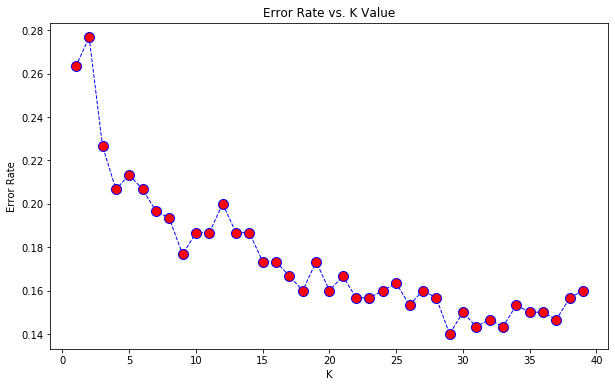

In [73]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate1,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10,lw=1)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Lets take K =29

In [76]:
knn_new = KNeighborsClassifier(n_neighbors=29)

In [77]:
knn_new.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

In [78]:
pred =knn_new.predict(Xtest)

In [79]:
print(confusion_matrix(ytest,pred))

[[117  25]
 [ 17 141]]


In [80]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       142
           1       0.85      0.89      0.87       158

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



We can see that , we got  better results once we use k =27

# Thank You